**Analisis dan Klasifikasi Berita Hoaks dan Asli yang ada di Indonesia**

Anggota Kelompok:

1. 2602149294 - Rebecca Fransiska Supit
2. 2602165606 - Riky Supriyadi
3. 2602151292 - Rudy Hartanto
4. 2602149470 - Ryan Ferdinand Hajadi
5. 2602165083 - Seandillon Nifataro Harefa

Kelas : LB01

Kelompok : 8

Course: Data Mining


## Import Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import libraries
import pandas as pd
import numpy as np
import re
import csv
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import log_loss
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score


## Import Dataset

In [3]:
# Load datasets
false_news_path = '/content/drive/MyDrive/Data Mining Project/Expanded_Indonesia_False_News.csv'
indonesian_news_path = '/content/drive/MyDrive/Data Mining Project/Indonesian News (2).csv'

false_news_data = pd.read_csv(false_news_path)
indonesian_news_data = pd.read_csv(indonesian_news_path, delimiter=';', encoding='utf-8', on_bad_lines='skip')

## Data Analysis

In [4]:
indonesian_news_data.shape

(9449, 28)

In [5]:
indonesian_news_data.head()

,id,source,title,image,url,content,date,embedding,created_at,updated_at,...,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27
0,83,tempo,"Depo Plumpang Terbakar, Anggota DPR Minta Pert...",https://statik.tempo.co/data/2023/03/04/id_118...,https://nasional.tempo.co/read/1698528/depo-pl...,"TEMPO.CO, Jakarta - Anggota Komisi VII DPR RI ...",2023-03-04 06:18:13+00,"[-0.01590039,-0.034130897,0.005732614,-0.01853...",2023-03-04 07:03:39.039332,2023-03-04 07:03:39.039332,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,84,tempo,Jokowi Perintahkan Wapres Ma'ruf Amin Tinjau L...,https://statik.tempo.co/data/2023/03/04/id_118...,https://nasional.tempo.co/read/1698522/jokowi-...,"TEMPO.CO, Jakarta - Presiden Joko Widodo atau ...",2023-03-04 06:04:38+00,"[-0.017608976,-0.021786924,0.01547983,-0.00932...",2023-03-04 07:03:39.039332,2023-03-04 07:03:39.039332,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,85,tempo,HNW Mendukung Jamaah Umroh First Travel Dapatk...,https://statik.tempo.co/data/2023/03/04/id_118...,https://nasional.tempo.co/read/1698527/hnw-men...,INFO NASIONAL - Wakil Ketua MPR RI Dr. H. M. H...,2023-03-04 06:18:04+00,"[0.00841488,-0.023665192,0.006762431,-0.013723...",2023-03-04 07:03:39.039332,2023-03-04 07:03:39.039332,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,86,tempo,Tim Dokkes Polri Telah Terima 14 Kantong Jenaz...,https://statik.tempo.co/data/2023/03/04/id_118...,https://nasional.tempo.co/read/1698540/tim-dok...,"TEMPO.CO, Jakarta - Tim Kedokteran dan Kesehat...",2023-03-04 06:44:10+00,"[-0.012671886,-0.0039057182,0.019575326,-0.016...",2023-03-04 07:03:39.039332,2023-03-04 07:03:39.039332,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,87,tempo,Bamsoet Ajak Komunitas Otomotif Kembangkan Per...,https://statik.tempo.co/data/2023/03/04/id_118...,https://nasional.tempo.co/read/1698536/bamsoet...,INFO NASIONAL - Ketua MPR RI sekaligus Ketua U...,2023-03-04 06:38:57+00,"[-0.015486176,-0.0125719,-0.0122843925,-0.0343...",2023-03-04 07:03:39.039332,2023-03-04 07:03:39.039332,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
indonesian_news_data.describe()

,id,source,title,image,url,content,date,embedding,created_at,updated_at,...,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27
count,9407,9397,9385,9287,9348,9211,9015,9015,9015,9015,...,4,4,3,2,1,1,1,1,1,1
unique,9406,27,9365,7933,9348,9144,8761,8859,1448,1448,...,4,4,3,2,1,1,1,1,1,1
top,,kumparan,"Proyek Tol Jokowi Potensi Bikin Rugi Negara, K...",https://statik.tempo.co/data/2023/03/10/id_118...,https://nasional.tempo.co/read/1698528/depo-pl...,"Jakarta, CNBC Indonesia - PT Astra Internation...",2023-03-13 23:30:55+00,"[0.0015690419,-0.01674868,-0.00096191745,0.002...",2023-03-15 00:15:13.834197,2023-03-15 00:15:13.834197,...,4. Meminta informasi kepada Pihak Pelapor berd...,5. Meneruskan informasi dan/atau hasil analisi...,6. Menerima laporan dan/atau informasi dari ma...,7. Meminta keterangan kepada Pihak Pelapor dan...,8. Merekomendasikan kepada instansi penegak hu...,9. Meminta penyedia jasa keuangan untuk menghe...,10. Meminta informasi perkembangan penyelidika...,11. Mengadakan kegiatan administratif lain dal...,dan12. Meneruskan hasil analisis atau pemerik...,"Rp 300 Triliun, Sri Mulyani: Banyak Persepsi ..."
freq,2,2601,2,16,1,3,4,85,239,239,...,1,1,1,1,1,1,1,1,1,1


In [7]:
indonesian_news_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9449 entries, 0 to 9448
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9407 non-null   object
 1   source       9397 non-null   object
 2   title        9385 non-null   object
 3   image        9287 non-null   object
 4   url          9348 non-null   object
 5   content      9211 non-null   object
 6   date         9015 non-null   object
 7   embedding    9015 non-null   object
 8   created_at   9015 non-null   object
 9   updated_at   9015 non-null   object
 10  summary      9005 non-null   object
 11  Unnamed: 11  12 non-null     object
 12  Unnamed: 12  10 non-null     object
 13  Unnamed: 13  8 non-null      object
 14  Unnamed: 14  6 non-null      object
 15  Unnamed: 15  5 non-null      object
 16  Unnamed: 16  5 non-null      object
 17  Unnamed: 17  4 non-null      object
 18  Unnamed: 18  4 non-null      object
 19  Unnamed: 19  4 non-null    

In [8]:
false_news_data.shape

(9231, 6)

In [9]:
false_news_data.head()

,ID,label,tanggal,judul,narasi,nama file gambar
0,71,1,17-Aug-20,Pemakaian Masker Menyebabkan Penyakit Legionna...,A caller to a radio talk show recently shared ...,71.jpg
1,461,1,17-Jul-20,Instruksi Gubernur Jateng tentang penilangan ...,Yth.Seluruh Anggota Grup Sesuai Instruksi Gube...,461.png
2,495,1,13-Jul-20,Foto Jim Rohn: Jokowi adalah presiden terbaik ...,Jokowi adalah presiden terbaik dlm sejarah ban...,495.png
3,550,1,8-Jul-20,"ini bukan politik, tapi kenyataan Pak Jokowi b...","Maaf Mas2 dan Mbak2, ini bukan politik, tapi k...",550.png
4,681,1,24-Jun-20,Foto Kadrun kalo lihat foto ini panas dingin,Kadrun kalo lihat foto ini panas dingin . .,681.jpg


In [10]:
false_news_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9231 entries, 0 to 9230
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                9231 non-null   int64 
 1   label             9231 non-null   int64 
 2   tanggal           9231 non-null   object
 3   judul             9231 non-null   object
 4   narasi            9231 non-null   object
 5   nama file gambar  9231 non-null   object
dtypes: int64(2), object(4)
memory usage: 432.8+ KB


## Merge Datasets and Preprocessing

In [11]:
  # Prepare datasets
  false_news_data = false_news_data[['judul', 'narasi']]
  false_news_data.columns = ['title', 'content']
  false_news_data['label'] = 1  # Hoax label

<ipython-input-11-d7add35aa3a3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  false_news_data['label'] = 1  # Hoax label


In [12]:
# Prepare datasets
indonesian_news_data = indonesian_news_data[['title', 'content']]
indonesian_news_data['label'] = 0  # True News

<ipython-input-12-549ca1800764>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indonesian_news_data['label'] = 0  # True News


In [13]:
# Combine datasets
combined_data = pd.concat([false_news_data, indonesian_news_data], ignore_index=True)

In [14]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18680 entries, 0 to 18679
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    18616 non-null  object
 1   content  18442 non-null  object
 2   label    18680 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 437.9+ KB


## EDA (Exploratory Data Analysis)

<ipython-input-15-96557ea76ecd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=combined_data, palette='viridis')


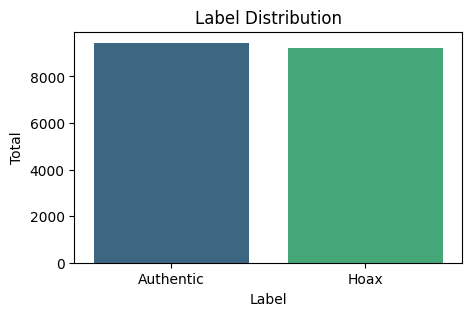

In [15]:
# Label Distribution
plt.figure(figsize=(5, 3))
sns.countplot(x='label', data=combined_data, palette='viridis')
plt.title('Label Distribution')
plt.xticks(ticks=[0, 1], labels=['Authentic', 'Hoax'])
plt.xlabel('Label')
plt.ylabel('Total')
plt.show()

In [16]:
print(combined_data.columns)

Index(['title', 'content', 'label'], dtype='object')


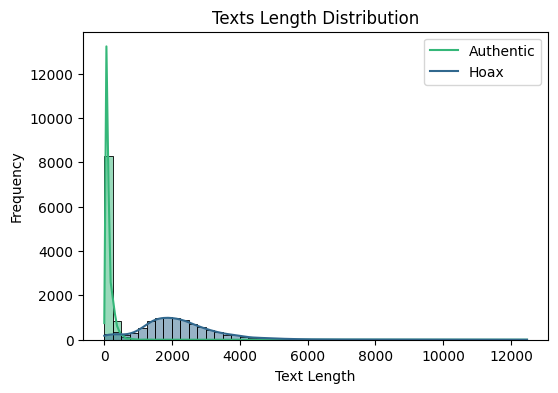

In [17]:
# Text's Length Distribution
combined_data['text_length'] = combined_data['content'].astype(str).apply(len) # Convert to string before applying len


plt.figure(figsize=(6, 4))
sns.histplot(data=combined_data, x='text_length', hue='label', kde=True, palette='viridis', bins=50)
plt.title('Texts Length Distribution')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.legend(['Authentic', 'Hoax'])
plt.show()

<ipython-input-18-39a4047800bb>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=words, palette='viridis')


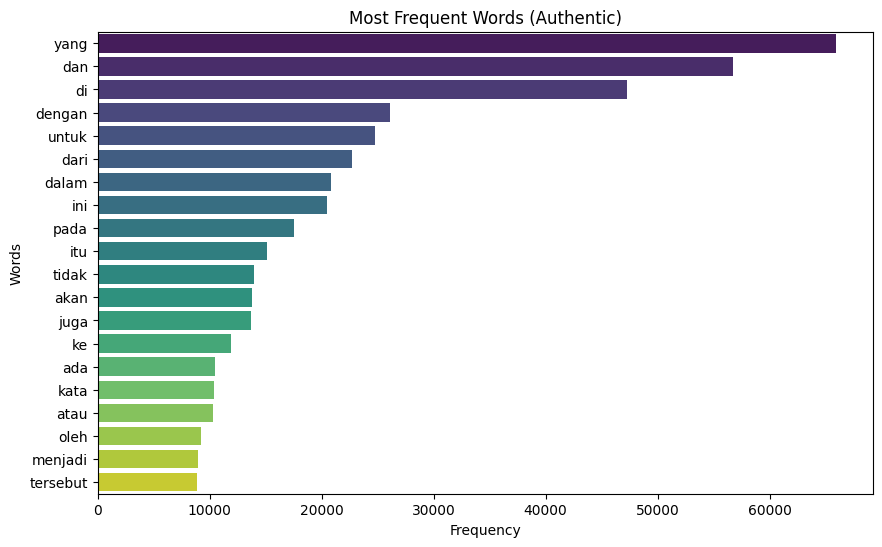

In [18]:
# Most Frequent Words (Authentic)

# Function untuk menghitung most frequent words
def get_top_words(texts, top_n=20):
    # Convert all elements of texts to strings before joining
    all_words = " ".join(str(text) for text in texts).split()  # Gabungkan semua teks dan pecah menjadi kata
    word_counts = Counter(all_words)  # Hitung frekuensi kata
    return word_counts.most_common(top_n)

# Most Frequent Words (Authentic)
authentic_texts = combined_data[combined_data['label'] == 0]['content']
authentic_top_words = get_top_words(authentic_texts, top_n=20)

# Visualisasi Most Frequent Words
def plot_top_words(top_words, title):
    words, counts = zip(*top_words)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=counts, y=words, palette='viridis')
    plt.title(title)
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.show()

# Visualisasi untuk Authentic
plot_top_words(authentic_top_words, "Most Frequent Words (Authentic)")

<ipython-input-19-6a73ea026097>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=words, palette='viridis')


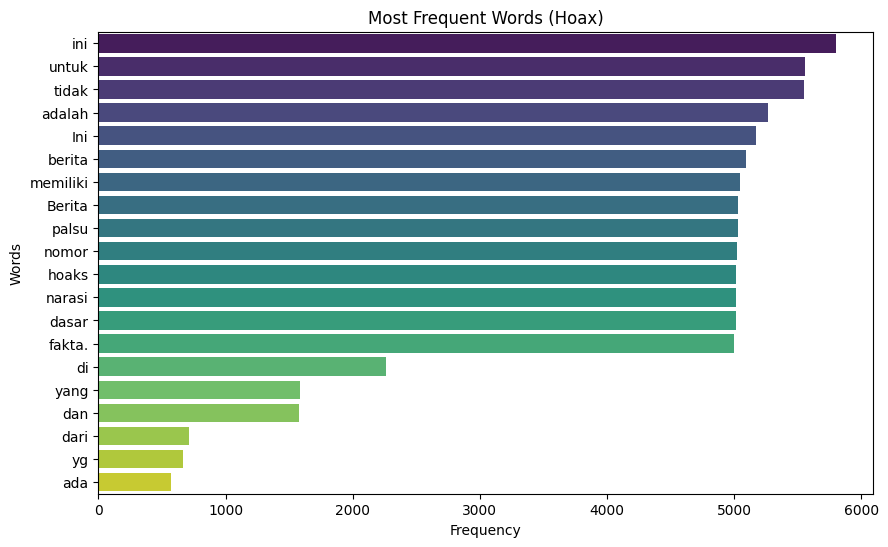

In [19]:
# Most Frequent Words (Hoax)

# Function untuk menghitung most frequent words
def get_top_words(texts, top_n=20):
    all_words = " ".join(texts).split()  # Gabungkan semua teks dan pecah menjadi kata
    word_counts = Counter(all_words)  # Hitung frekuensi kata
    return word_counts.most_common(top_n)

# Most Frequent Words (Hoax)
hoax_texts = combined_data[combined_data['label'] == 1]['content']
hoax_top_words = get_top_words(hoax_texts, top_n=20)

# Visualisasi Most Frequent Words
def plot_top_words(top_words, title):
    words, counts = zip(*top_words)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=counts, y=words, palette='viridis')
    plt.title(title)
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.show()

# Visualisasi untuk Hoax
plot_top_words(hoax_top_words, "Most Frequent Words (Hoax)")

## Using Random Forest Algorithm

In [20]:
# Preprocessing function with NaN handling
def preprocess_text(text):
    if isinstance(text, str):  # Ensure the text is a string
        text = text.lower()  # Lowercase
        text = re.sub(r'\d+', '', text)  # Remove numbers
        text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
        text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    else:
        text = ""  # Handle NaN or non-string values
    return text

# Apply preprocessing
combined_data['content'] = combined_data['content'].apply(preprocess_text)
combined_data['title'] = combined_data['title'].apply(preprocess_text)


# Combine title and content for simplicity
combined_data['text'] = combined_data['title'] + " " + combined_data['content']


In [33]:
# Handle NaN values in the 'label' column before splitting
combined_data = combined_data.dropna(subset=['label'])  # Remove rows with NaN in 'label'

# Split data 80/20
X = combined_data['content']
y = combined_data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Percobaan pembagian data 70/30
X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split(X, y, test_size=0.3, random_state=42)

# Percobaan pembagian data 90/10
X_train_90, X_test_10, y_train_90, y_test_10 = train_test_split(X, y, test_size=0.1, random_state=42)

# Menampilkan jumlah data pada setiap pembagian
print("80/20 Split - Training Data:", len(X_train), "| Testing Data:", len(X_test))
print("70/30 Split - Training Data:", len(X_train_70), "| Testing Data:", len(X_test_30))
print("90/10 Split - Training Data:", len(X_train_90), "| Testing Data:", len(X_test_10))

# TF-IDF Vectorization
X_train = X_train.fillna('')  # Ganti NaN dengan string kosong
X_test = X_test.fillna('')
tfidf = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

70/30 Split - Training Data: 14944 | Testing Data: 3736
70/30 Split - Training Data: 13076 | Testing Data: 5604
90/10 Split - Training Data: 16812 | Testing Data: 1868


Random Forest (80/20) Results

In [22]:
# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train_tfidf, y_train)

# Predictions
y_pred = model.predict(X_test_tfidf)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Get predicted probabilities for Random Forest
y_pred_prob_rf = model.predict_proba(X_test_tfidf)

# Calculate Log Loss for Random Forest
log_loss_rf = log_loss(y_test, y_pred_prob_rf)
print(f"Random Forest Log Loss: {log_loss_rf:.4f}")

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1883
           1       0.99      0.97      0.98      1853

    accuracy                           0.98      3736
   macro avg       0.98      0.98      0.98      3736
weighted avg       0.98      0.98      0.98      3736

Random Forest Log Loss: 0.0691


Random Forest (70/30) Results

In [34]:
# Train and Evaluate Random Forest for 70/30 Split
model_70_30 = RandomForestClassifier(random_state=42)
model_70_30.fit(tfidf.fit_transform(X_train_70.fillna('')), y_train_70)

# Predictions for 70/30 Split
y_pred_70_30 = model_70_30.predict(tfidf.transform(X_test_30.fillna('')))

# Confusion Matrix for 70/30
cm_70_30 = confusion_matrix(y_test_30, y_pred_70_30)

# Evaluation for 70/30
print("Classification Report for 70/30 Split:")
print(classification_report(y_test_30, y_pred_70_30))

# Log Loss for 70/30
y_pred_prob_rf_70_30 = model_70_30.predict_proba(tfidf.transform(X_test_30.fillna('')))
log_loss_rf_70_30 = log_loss(y_test_30, y_pred_prob_rf_70_30)
print(f"Random Forest Log Loss for 70/30 Split: {log_loss_rf_70_30:.4f}")

Classification Report for 70/30 Split:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2834
           1       0.99      0.97      0.98      2770

    accuracy                           0.98      5604
   macro avg       0.98      0.98      0.98      5604
weighted avg       0.98      0.98      0.98      5604

Random Forest Log Loss for 70/30 Split: 0.0710


Random Forest (90/10) Results

In [35]:
# Train and Evaluate Random Forest for 90/10 Split
model_90_10 = RandomForestClassifier(random_state=42)
model_90_10.fit(tfidf.fit_transform(X_train_90.fillna('')), y_train_90)

# Predictions for 90/10 Split
y_pred_90_10 = model_90_10.predict(tfidf.transform(X_test_10.fillna('')))

# Confusion Matrix for 90/10
cm_90_10 = confusion_matrix(y_test_10, y_pred_90_10)

# Evaluation for 90/10
print("Classification Report for 90/10 Split:")
print(classification_report(y_test_10, y_pred_90_10))

# Log Loss for 90/10
y_pred_prob_rf_90_10 = model_90_10.predict_proba(tfidf.transform(X_test_10.fillna('')))
log_loss_rf_90_10 = log_loss(y_test_10, y_pred_prob_rf_90_10)
print(f"Random Forest Log Loss for 90/10 Split: {log_loss_rf_90_10:.4f}")

Classification Report for 90/10 Split:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       948
           1       0.99      0.97      0.98       920

    accuracy                           0.98      1868
   macro avg       0.98      0.98      0.98      1868
weighted avg       0.98      0.98      0.98      1868

Random Forest Log Loss for 90/10 Split: 0.0630


Random Forest 80/20 5-K-Fold Cross Validation

In [23]:
# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)

# Perform 5-fold cross-validation
rf_scores = cross_val_score(rf_model, X_train_tfidf, y_train, cv=5, scoring='accuracy')

# Print the cross-validation results
print("Random Forest Cross-Validation Scores:", rf_scores)
print("Random Forest Mean Accuracy:", rf_scores.mean())
print("Random Forest Standard Deviation:", rf_scores.std())

Random Forest Cross-Validation Scores: [0.9715624  0.97290064 0.97624624 0.9732352  0.97556894]
Random Forest Mean Accuracy: 0.9739026810935053
Random Forest Standard Deviation: 0.0017432868989406686


### Visualization For Random Forest


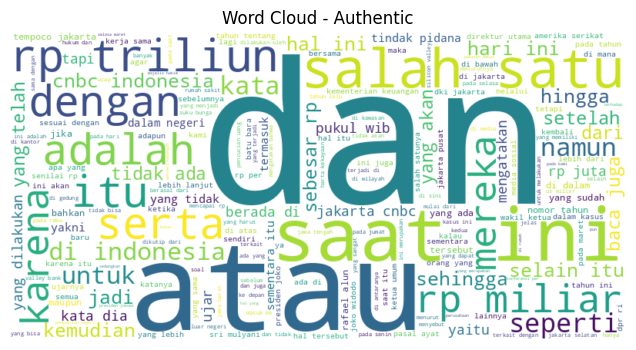

In [24]:
# Word cloud for Authentic
authentic_text = " ".join(combined_data[combined_data['label'] == 0]['content'].astype(str)) # Convert to string type
wordcloud_authentic = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(authentic_text)

plt.figure(figsize=(8, 4))
plt.imshow(wordcloud_authentic, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Authentic')
plt.show()

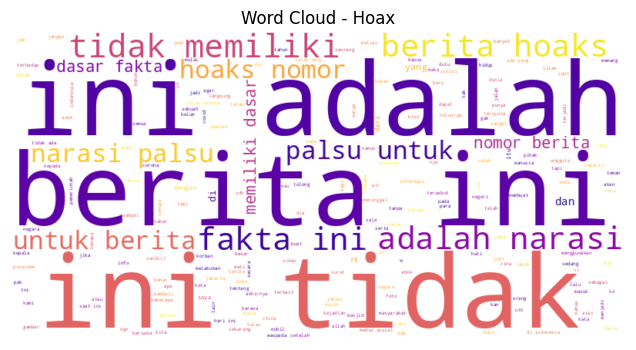

In [25]:
# Word cloud for Hoax
hoax_text = " ".join(combined_data[combined_data['label'] == 1]['content'].astype(str)) # Convert to string
wordcloud_hoax = WordCloud(width=800, height=400, background_color='white', colormap='plasma').generate(hoax_text)
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud_hoax, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Hoax')
plt.show()

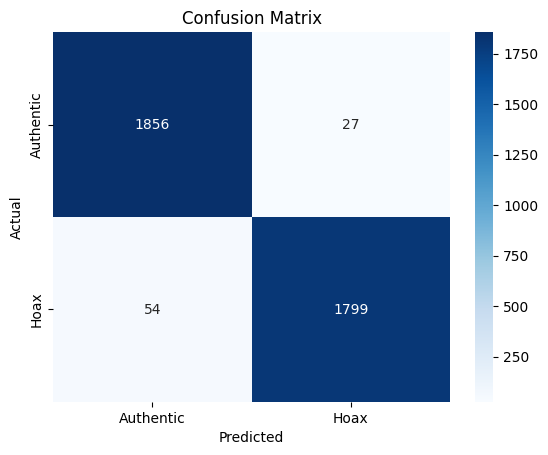

In [26]:
# Visualizing the Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Authentic', 'Hoax'], yticklabels=['Authentic', 'Hoax'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

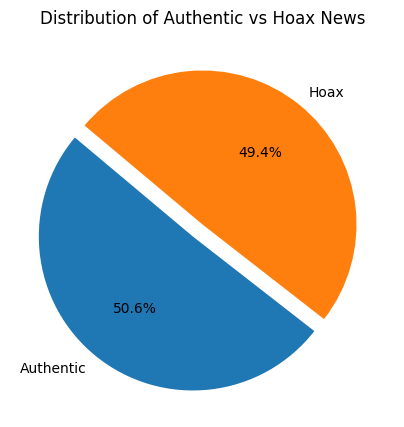

In [27]:
label_counts = combined_data['label'].value_counts()
labels = ['Authentic', 'Hoax']
colors = ['#1f77b4', '#ff7f0e']

# Plot pie chart
plt.figure(figsize=(5, 5))
plt.pie(label_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=(0.1, 0))  # Explode sedikit kategori pertama
plt.title('Distribution of Authentic vs Hoax News')
plt.show()

## Using KNN



KNN (80/20) Results

In [28]:
# Initialize K-Nearest Neighbors (KNN) classifier
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can experiment with different k values

# Train the KNN model (no actual training phase, just storing data)
knn_model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test_tfidf)

# Evaluation
print("KNN - Classification Report:")
print(classification_report(y_test, y_pred_knn))

# Get predicted probabilities for KNN
y_pred_prob_knn = knn_model.predict_proba(X_test_tfidf)

# Calculate Log Loss for KNN
log_loss_knn = log_loss(y_test, y_pred_prob_knn)
print(f"KNN Log Loss: {log_loss_knn:.4f}")


KNN - Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.96      0.87      1883
           1       0.94      0.76      0.84      1853

    accuracy                           0.86      3736
   macro avg       0.87      0.86      0.86      3736
weighted avg       0.87      0.86      0.86      3736

KNN Log Loss: 0.9950


KNN (70/30) Results

In [36]:
# KNN for 70/30 Split
knn_model_70_30 = KNeighborsClassifier(n_neighbors=5)  # Experiment with n_neighbors if needed
knn_model_70_30.fit(tfidf.fit_transform(X_train_70.fillna('')), y_train_70)

# Predictions for 70/30 Split
y_pred_knn_70_30 = knn_model_70_30.predict(tfidf.transform(X_test_30.fillna('')))

# Evaluation for 70/30
print("KNN - Classification Report for 70/30 Split:")
print(classification_report(y_test_30, y_pred_knn_70_30))

# Log Loss for 70/30
y_pred_prob_knn_70_30 = knn_model_70_30.predict_proba(tfidf.transform(X_test_30.fillna('')))
log_loss_knn_70_30 = log_loss(y_test_30, y_pred_prob_knn_70_30)
print(f"KNN Log Loss for 70/30 Split: {log_loss_knn_70_30:.4f}")

KNN - Classification Report for 70/30 Split:
              precision    recall  f1-score   support

           0       0.80      0.95      0.87      2834
           1       0.94      0.75      0.84      2770

    accuracy                           0.85      5604
   macro avg       0.87      0.85      0.85      5604
weighted avg       0.87      0.85      0.85      5604

KNN Log Loss for 70/30 Split: 1.0508


KNN (90/10) Results

In [37]:
# KNN for 90/10 Split
knn_model_90_10 = KNeighborsClassifier(n_neighbors=5)  # Experiment with n_neighbors if needed
knn_model_90_10.fit(tfidf.fit_transform(X_train_90.fillna('')), y_train_90)

# Predictions for 90/10 Split
y_pred_knn_90_10 = knn_model_90_10.predict(tfidf.transform(X_test_10.fillna('')))

# Evaluation for 90/10
print("KNN - Classification Report for 90/10 Split:")
print(classification_report(y_test_10, y_pred_knn_90_10))

# Log Loss for 90/10
y_pred_prob_knn_90_10 = knn_model_90_10.predict_proba(tfidf.transform(X_test_10.fillna('')))
log_loss_knn_90_10 = log_loss(y_test_10, y_pred_prob_knn_90_10)
print(f"KNN Log Loss for 90/10 Split: {log_loss_knn_90_10:.4f}")

KNN - Classification Report for 90/10 Split:
              precision    recall  f1-score   support

           0       0.81      0.96      0.88       948
           1       0.95      0.76      0.85       920

    accuracy                           0.86      1868
   macro avg       0.88      0.86      0.86      1868
weighted avg       0.88      0.86      0.86      1868

KNN Log Loss for 90/10 Split: 0.6574


KNN 5-K-Fold Cross Validation

In [29]:
# Initialize KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Perform 5-fold cross-validation
knn_scores = cross_val_score(knn_model, X_train_tfidf, y_train, cv=5, scoring='accuracy')

# Print the cross-validation results
print("KNN Cross-Validation Scores:", knn_scores)
print("KNN Mean Accuracy:", knn_scores.mean())
print("KNN Standard Deviation:", knn_scores.std())

KNN Cross-Validation Scores: [0.83405821 0.8517899  0.8484443  0.84911342 0.83868809]
KNN Mean Accuracy: 0.8444187814041937
KNN Standard Deviation: 0.0068229016539315636


### Visualization For KNN

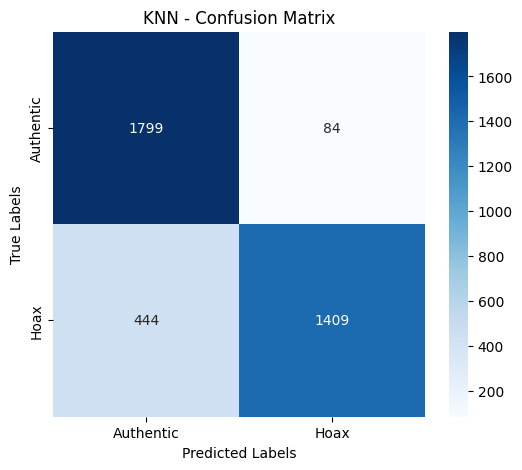

In [30]:
# Plot Confusion Matrix as a Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Blues', xticklabels=['Authentic', 'Hoax'], yticklabels=['Authentic', 'Hoax'])
plt.title('KNN - Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

<ipython-input-31-b723e4570567>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts_knn.index, y=label_counts_knn.values, palette='magma')


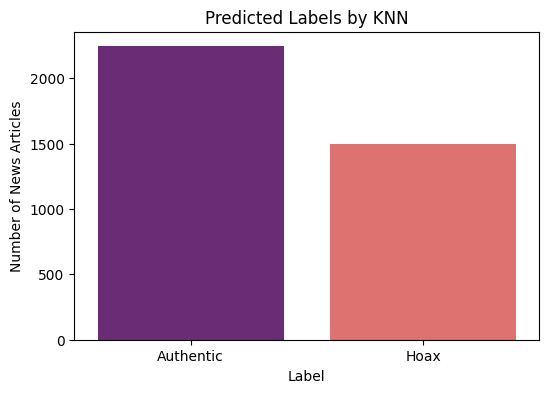

In [31]:
# Get counts of predicted labels (0: Authentic, 1: Hoax) for KNN
predicted_labels_knn = y_pred_knn
label_counts_knn = pd.Series(predicted_labels_knn).value_counts()

# Plotting the bar chart for KNN
plt.figure(figsize=(6, 4))
sns.barplot(x=label_counts_knn.index, y=label_counts_knn.values, palette='magma')
plt.title('Predicted Labels by KNN')
plt.xlabel('Label')
plt.ylabel('Number of News Articles')
plt.xticks([0, 1], ['Authentic', 'Hoax'])
plt.show()

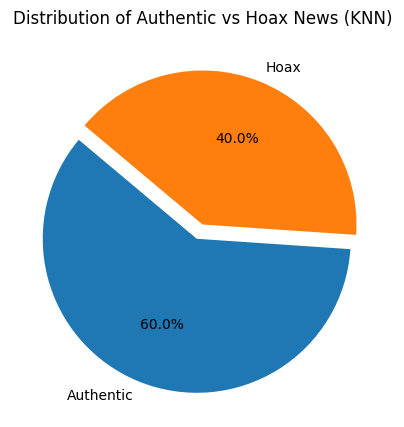

In [32]:
# Get the count of predicted labels (0: Authentic, 1: Hoax) for KNN
label_counts_knn = pd.Series(y_pred_knn).value_counts()

# Plot pie chart for KNN
plt.figure(figsize=(5, 5))
plt.pie(label_counts_knn, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=(0.1, 0))
plt.title('Distribution of Authentic vs Hoax News (KNN)')
plt.show()